# Augmentor for Data Augmentation
https://augmentor.readthedocs.io/en/master/index.html

In [1]:
#!pip install augmentor

In [2]:
import Augmentor

In [3]:
%mkdir myimages

In [4]:
%cd myimages

/mnt/batch/tasks/shared/LS_root/mounts/clusters/instancenotebook/code/Users/seretkow/augmentor/myimages


## 1. Let's download an image file

In [5]:
!wget http://www.olielo.com/wp-content/uploads/2013/12/Tour-Eiffel.jpg

--2021-07-08 14:03:47--  http://www.olielo.com/wp-content/uploads/2013/12/Tour-Eiffel.jpg
Resolving www.olielo.com (www.olielo.com)... 109.234.162.74
Connecting to www.olielo.com (www.olielo.com)|109.234.162.74|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201574 (197K) [image/jpeg]
Saving to: ‘Tour-Eiffel.jpg’

Tour-Eiffel.jpg     100%[===================>] 196.85K  --.-KB/s    in 0.08s   

2021-07-08 14:03:47 (2.48 MB/s) - ‘Tour-Eiffel.jpg’ saved [201574/201574]



In [6]:
%cd ..

/mnt/batch/tasks/shared/LS_root/mounts/clusters/instancenotebook/code/Users/seretkow/augmentor


In [7]:
count=0
for root, _, files in os.walk('myimages/'):
    count=count+len(files)
print("Total images =", count)
!ls myimages/*.*

Total images = 1
myimages/Tour-Eiffel.jpg


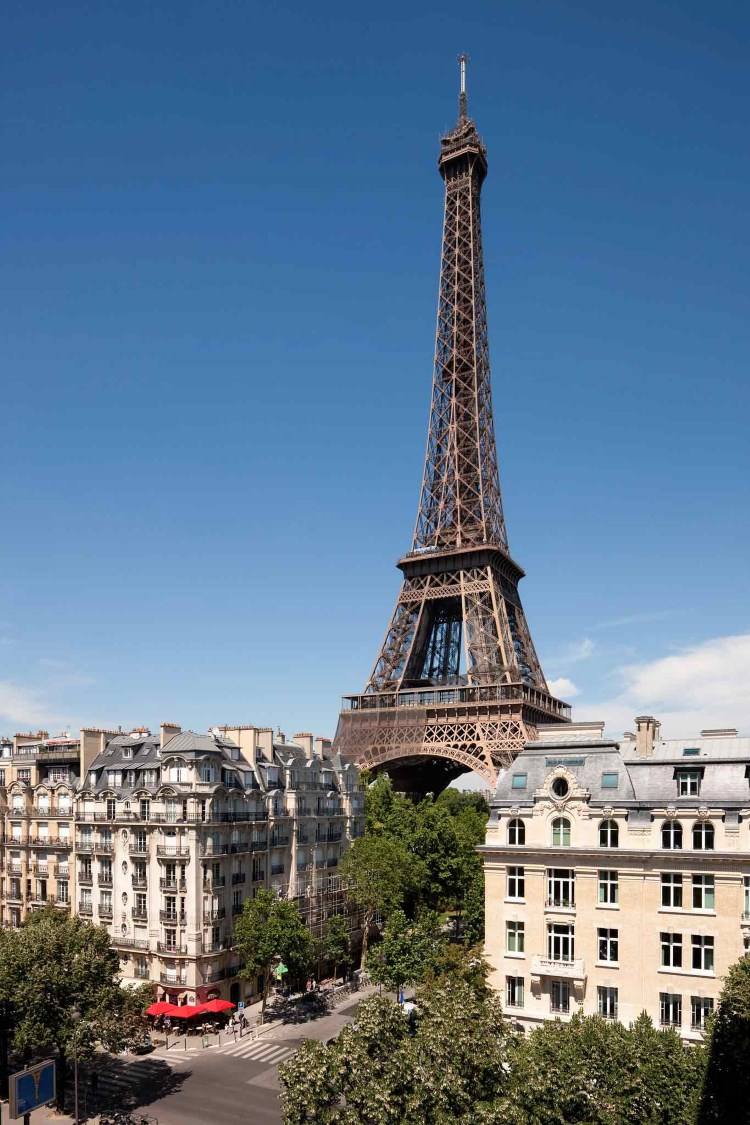

In [8]:
image_file="myimages/Tour-Eiffel.jpg"
from IPython.display import Image
Image(filename=image_file, width=300)

## 2. Let's do image data augmentation

https://augmentor.readthedocs.io/en/master/

In [9]:
augmentorpipeline = Augmentor.Pipeline("myimages")

augmentorpipeline.skew_tilt(probability=0.2)
augmentorpipeline.zoom(probability=0.2, min_factor=1.1, max_factor=1)
augmentorpipeline.flip_left_right(probability=0.2)
augmentorpipeline.skew(probability=0.1)
augmentorpipeline.crop_random(probability=0.2, percentage_area=0.9)
augmentorpipeline.shear(probability=0.1, max_shear_left=0.2, max_shear_right=0.2)

Initialised with 1 image(s) found.
Output directory set to myimages/output.

In [10]:
# Let's run the pipeline
augmentorpipeline.sample(100)

Processing <PIL.Image.Image image mode=RGB size=750x1125 at 0x7F9C347DE0F0>: 100%|██████████| 100/100 [00:05<00:00, 19.20 Samples/s]                 


In [11]:
augmentorpipeline.status()

Operations: 6
	0: Skew (probability=0.2 skew_type=TILT magnitude=1 )
	1: Zoom (probability=0.2 min_factor=1.1 max_factor=1 )
	2: Flip (probability=0.2 top_bottom_left_right=LEFT_RIGHT )
	3: Skew (probability=0.1 skew_type=RANDOM magnitude=1 )
	4: CropPercentage (probability=0.2 percentage_area=0.9 centre=False randomise_percentage_area=False )
	5: Shear (probability=0.1 max_shear_left=0.2 max_shear_right=0.2 )
Images: 1
Classes: 1
	Class index: 0 Class label: myimages 
Dimensions: 1
	Width: 750 Height: 1125
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [12]:
count=0
for root, _, files in os.walk('myimages/output'):
    count=count+len(files)
print("Total images generated =", count)

Total images generated = 100


In [13]:
!ls myimages/output/*.*

myimages/output/myimages_original_Tour-Eiffel.jpg_0495ea77-8da1-494f-8597-1c44659bc9d1.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_0714aa10-27a7-445a-a917-309a656c2a69.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_095349f8-4bbd-4d76-b478-7e2bb28232a0.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_0dcdacd6-4be7-406e-90a0-221686daba9e.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_0f9fefb7-b7b9-4703-91e1-b43bfd2cd384.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_104eea2c-1ab3-4160-910c-1b2f2ff50be8.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_1051c978-8d9d-41af-8f2f-1237fe29dcca.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_18d1cd60-4f7a-4d01-8870-2422ce41a0f9.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_1bf722ef-117f-43a2-9dd6-8d785da29b1b.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_2115e78b-112a-44cd-a27b-993a76670c10.jpg
myimages/output/myimages_original_Tour-Eiffel.jpg_24678518-fda0-457c-8f97-5277a3e50626.jpg

### Initial image

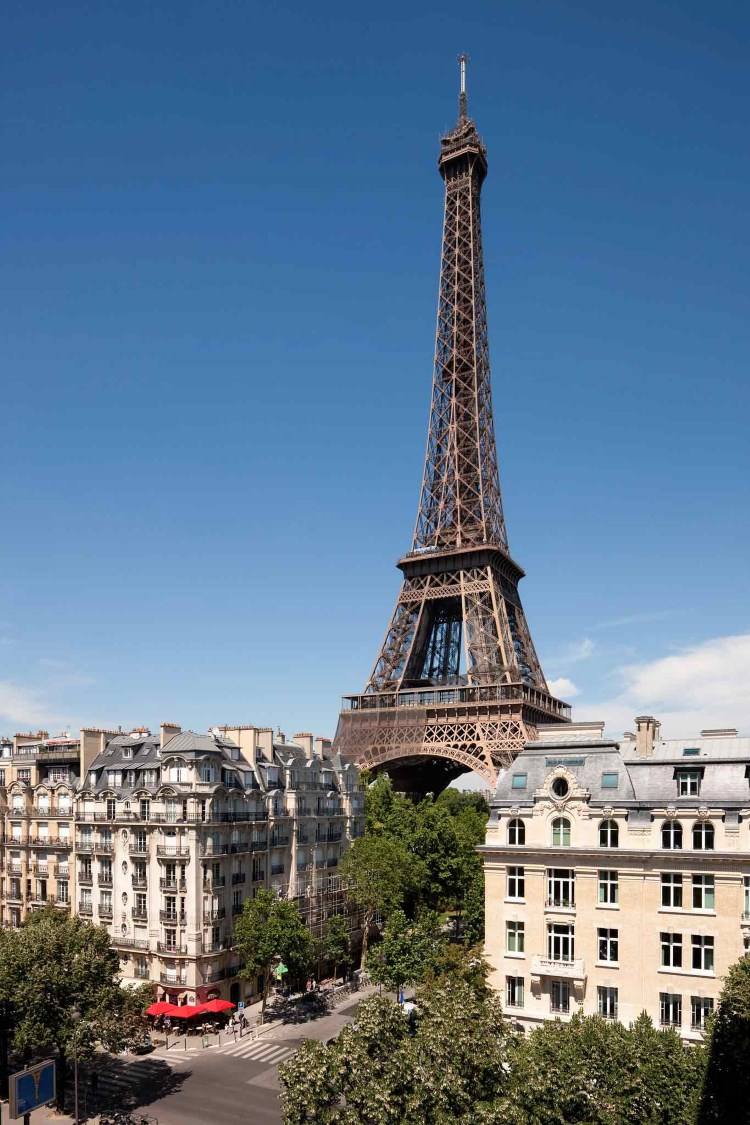

In [25]:
image_file="myimages/Tour-Eiffel.jpg"
from IPython.display import Image
Image(filename=image_file, width=200)

### Generated images

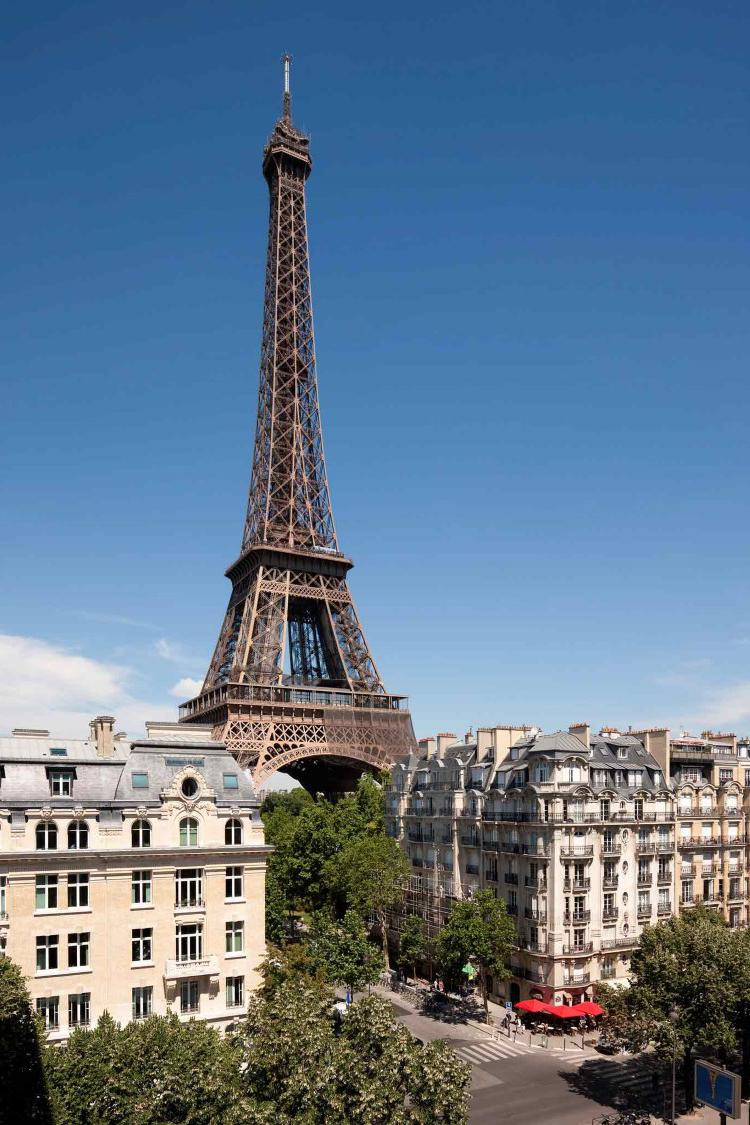

In [26]:
image_file="myimages/output/myimages_original_Tour-Eiffel.jpg_724e3bec-7daa-4b5b-8eaf-fdb15709d71b.jpg"
from IPython.display import Image
Image(filename=image_file,  width=200)

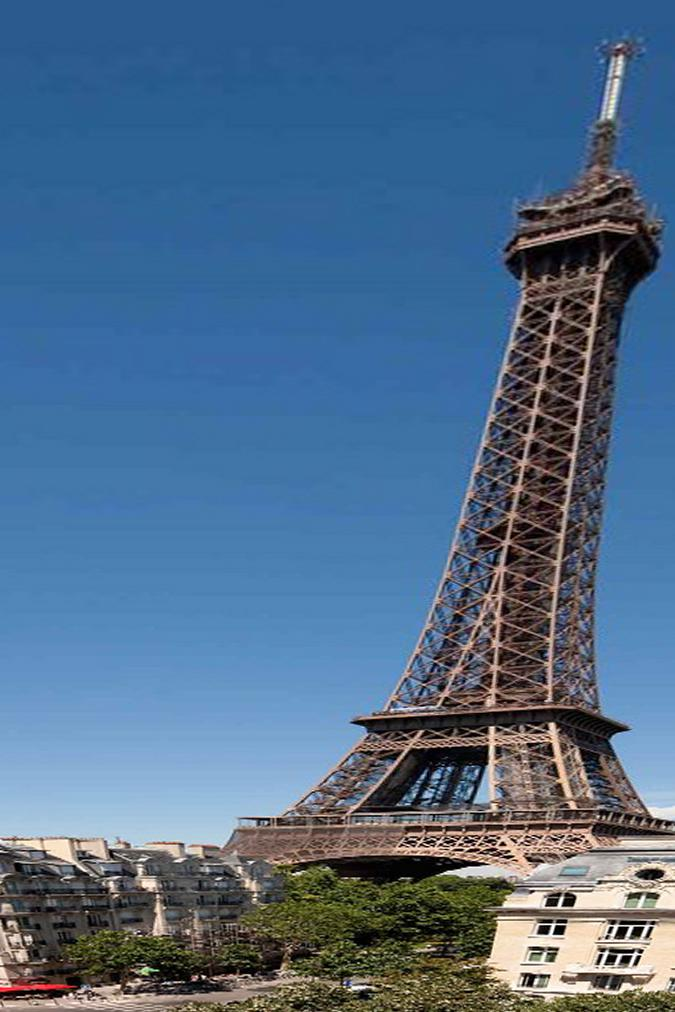

In [27]:
image_file="myimages/output/myimages_original_Tour-Eiffel.jpg_3b886492-eec8-40c7-8d9b-8f49a93488ea.jpg"
Image(filename=image_file,  width=200)

## 3. Zipping the generated images

In [18]:
from zipfile import ZipFile
import os
from os.path import basename

with ZipFile('augmentedimages.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk('myimages'):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath, basename(filePath))

In [19]:
!ls augmentedimages.zip -l

-rwxrwxrwx 1 root root 11715873 Jul  8 14:05 augmentedimages.zip
